# Part 1 - Introduction to Data Mining -  Project - Martina Galletti r0740962

# 1.1. A first glance of the dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [82]:
!pwd

/Users/martinagalletti/Desktop/progetto/parte 1 finita


In [4]:
data = pd.read_csv('activities(2).csv', na_values=['?'])

print('There are ' + str(data.shape[0]) + ' records')
print('There are ' + str(data.columns.size) + ' attributes:')
data_types = data.dtypes
print(data_types)

data.head()



FileNotFoundError: [Errno 2] File b'activities(2).csv' does not exist: b'activities(2).csv'

In [84]:
data.describe()

,duration,distance,user,age,weight
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,25.084620,23.579390,47527.543000,26.241000,63.99020
std,23.085365,17.561124,30732.151811,7.744992,5.93963
min,0.590000,2.130000,252.000000,16.000000,50.20000
25%,1.530000,7.457500,17999.000000,20.000000,60.10000
50%,30.420000,14.970000,51396.000000,25.000000,63.85000
75%,46.442500,39.840000,77493.000000,29.000000,67.60000
max,73.210000,68.610000,99508.000000,49.000000,76.70000


In [85]:
data.describe(include = 'all')

,date,activity,duration,distance,type,user,age,gender,weight,location
count,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.00000,692
unique,108,2,NaN,NaN,2,NaN,NaN,2,NaN,37
top,19/01/2019,run,NaN,NaN,workout,NaN,NaN,f,NaN,"Lodwar, KE"
freq,41,536,NaN,NaN,954,NaN,NaN,635,NaN,84
mean,NaN,NaN,25.084620,23.579390,NaN,47527.543000,26.241000,NaN,63.99020,NaN
std,NaN,NaN,23.085365,17.561124,NaN,30732.151811,7.744992,NaN,5.93963,NaN
min,NaN,NaN,0.590000,2.130000,NaN,252.000000,16.000000,NaN,50.20000,NaN
25%,NaN,NaN,1.530000,7.457500,NaN,17999.000000,20.000000,NaN,60.10000,NaN
50%,NaN,NaN,30.420000,14.970000,NaN,51396.000000,25.000000,NaN,63.85000,NaN
75%,NaN,NaN,46.442500,39.840000,NaN,77493.000000,29.000000,NaN,67.60000,NaN


In [86]:
data.describe(include = 'object')

,date,activity,type,gender,location
count,1000,1000,1000,1000,692
unique,108,2,2,2,37
top,19/01/2019,run,workout,f,"Lodwar, KE"
freq,41,536,954,635,84


In [87]:
data.describe(include = 'float')

,duration,distance,weight
count,1000.000000,1000.000000,1000.00000
mean,25.084620,23.579390,63.99020
std,23.085365,17.561124,5.93963
min,0.590000,2.130000,50.20000
25%,1.530000,7.457500,60.10000
50%,30.420000,14.970000,63.85000
75%,46.442500,39.840000,67.60000
max,73.210000,68.610000,76.70000


In [88]:
data.describe(include = 'integer')

,user,age
count,1000.000000,1000.000000
mean,47527.543000,26.241000
std,30732.151811,7.744992
min,252.000000,16.000000
25%,17999.000000,20.000000
50%,51396.000000,25.000000
75%,77493.000000,29.000000
max,99508.000000,49.000000


# 1.2. Noticing the Inconsistencies

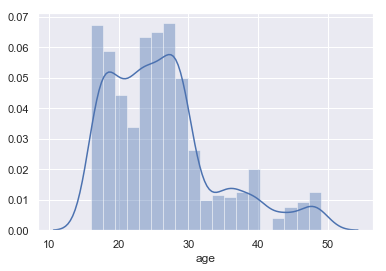

In [89]:
sns.distplot(data['age']);

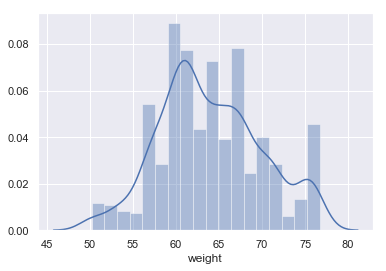

In [90]:
sns.distplot(data['weight']);

In [91]:
data['duration'].describe()

count    1000.000000
mean       25.084620
std        23.085365
min         0.590000
25%         1.530000
50%        30.420000
75%        46.442500
max        73.210000
Name: duration, dtype: float64

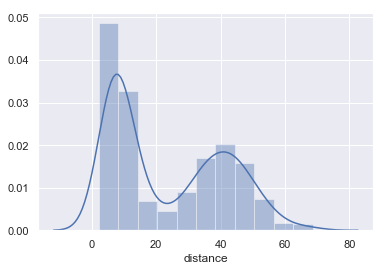

In [92]:
sns.distplot(data['distance']);

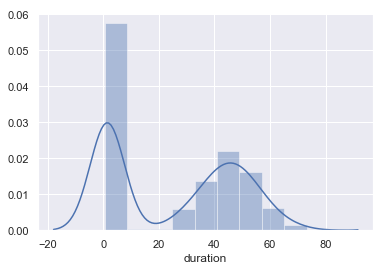

In [93]:
sns.distplot(data['duration']);

# 1.3. Duration normalization

In [94]:
data.loc[(data['duration']<20), 'duration'] = 60  * data.loc[(data['duration']<20),'duration']

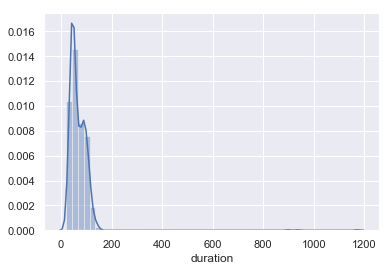

In [95]:
sns.distplot(data['duration']);

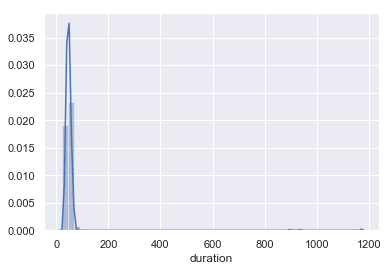

In [96]:
sns.distplot(data[data["activity"] == "run"]["duration"])
#plt.show()

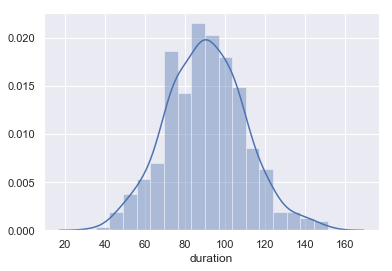

In [97]:
sns.distplot(data[data["activity"] == "ride"]["duration"])
#plt.show()

In [98]:
data.head()

,date,activity,duration,distance,type,user,age,gender,weight,location
0,01/01/2019,run,48.80,5.07,workout,61717,29,m,75.9,NaN
1,01/01/2019,ride,100.20,42.91,workout,1093,26,f,66.0,NaN
2,01/01/2019,ride,90.60,39.09,workout,8736,24,f,62.2,NaN
3,01/01/2019,run,57.86,8.11,workout,35688,18,f,59.3,"Aurora, US"
4,01/01/2019,ride,80.40,34.22,workout,24235,23,f,59.8,NaN


# 1.4.distance normalize

In [99]:
data.loc[(data['distance']>20), 'distance'] = 	 data.loc[(data['distance']>20),'distance'] /1.609344

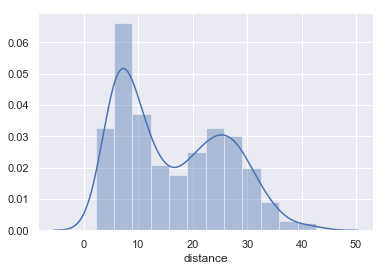

In [100]:
sns.distplot(data['distance']);

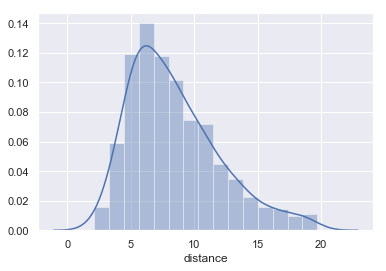

In [101]:
#import matplotlib.pyplot as plt

sns.distplot(data[data["activity"] == "run"]["distance"])
#plt.show()

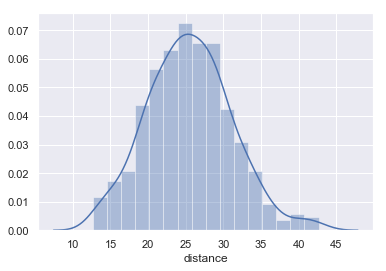

In [102]:
sns.distplot(data[data["activity"] == "ride"]["distance"])

# 1.5. Dealing with Missing Values

In [103]:
data['location'].fillna(value='UN', inplace=True)

In [104]:
data.describe()

,duration,distance,user,age,weight
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,69.26677,16.357871,47527.543000,26.241000,63.99020
std,58.21478,9.674992,30732.151811,7.744992,5.93963
min,21.17000,2.130000,252.000000,16.000000,50.20000
25%,44.62750,7.457500,17999.000000,20.000000,60.10000
50%,57.62500,13.935000,51396.000000,25.000000,63.85000
75%,88.80000,24.755428,77493.000000,29.000000,67.60000
max,1172.40000,42.632277,99508.000000,49.000000,76.70000


In [105]:
df = pd.read_csv('activities(2).csv', parse_dates=['date'], dayfirst=True)

In [106]:
data["country"] = data["location"].apply(lambda x: x[-2:])
data.head()

,date,activity,duration,distance,type,user,age,gender,weight,location,country
0,01/01/2019,run,48.80,5.070000,workout,61717,29,m,75.9,UN,UN
1,01/01/2019,ride,100.20,26.663038,workout,1093,26,f,66.0,UN,UN
2,01/01/2019,ride,90.60,24.289400,workout,8736,24,f,62.2,UN,UN
3,01/01/2019,run,57.86,8.110000,workout,35688,18,f,59.3,"Aurora, US",US
4,01/01/2019,ride,80.40,21.263322,workout,24235,23,f,59.8,UN,UN


# 1.6. Normalizing the date.  

In [107]:
def to_dt(df):
    if df.country == 'US':
        return pd.to_datetime(df.date, format="%m/%d/%Y")
    else:
        return pd.to_datetime(df.date, format="%d/%m/%Y")

In [108]:
data['datetime'] = data.apply(to_dt, axis=1)
data.head()

,date,activity,duration,distance,type,user,age,gender,weight,location,country,datetime
0,01/01/2019,run,48.80,5.070000,workout,61717,29,m,75.9,UN,UN,2019-01-01
1,01/01/2019,ride,100.20,26.663038,workout,1093,26,f,66.0,UN,UN,2019-01-01
2,01/01/2019,ride,90.60,24.289400,workout,8736,24,f,62.2,UN,UN,2019-01-01
3,01/01/2019,run,57.86,8.110000,workout,35688,18,f,59.3,"Aurora, US",US,2019-01-01
4,01/01/2019,ride,80.40,21.263322,workout,24235,23,f,59.8,UN,UN,2019-01-01


In [109]:
data['date_date'] = data['datetime'].dt.date
data.head()

,date,activity,duration,distance,type,user,age,gender,weight,location,country,datetime,date_date
0,01/01/2019,run,48.80,5.070000,workout,61717,29,m,75.9,UN,UN,2019-01-01,2019-01-01
1,01/01/2019,ride,100.20,26.663038,workout,1093,26,f,66.0,UN,UN,2019-01-01,2019-01-01
2,01/01/2019,ride,90.60,24.289400,workout,8736,24,f,62.2,UN,UN,2019-01-01,2019-01-01
3,01/01/2019,run,57.86,8.110000,workout,35688,18,f,59.3,"Aurora, US",US,2019-01-01,2019-01-01
4,01/01/2019,ride,80.40,21.263322,workout,24235,23,f,59.8,UN,UN,2019-01-01,2019-01-01


In [110]:
data['date'].describe()
data.dtypes

date                 object
activity             object
duration            float64
distance            float64
type                 object
user                  int64
age                   int64
gender               object
weight              float64
location             object
country              object
datetime     datetime64[ns]
date_date            object
dtype: object

In [111]:
data['date_month'] = data['datetime'].dt.month
data.head()

,date,activity,duration,distance,type,user,age,gender,weight,location,country,datetime,date_date,date_month
0,01/01/2019,run,48.80,5.070000,workout,61717,29,m,75.9,UN,UN,2019-01-01,2019-01-01,1
1,01/01/2019,ride,100.20,26.663038,workout,1093,26,f,66.0,UN,UN,2019-01-01,2019-01-01,1
2,01/01/2019,ride,90.60,24.289400,workout,8736,24,f,62.2,UN,UN,2019-01-01,2019-01-01,1
3,01/01/2019,run,57.86,8.110000,workout,35688,18,f,59.3,"Aurora, US",US,2019-01-01,2019-01-01,1
4,01/01/2019,ride,80.40,21.263322,workout,24235,23,f,59.8,UN,UN,2019-01-01,2019-01-01,1


In [112]:
data['date_year'] = data['datetime'].dt.year
data.head()

,date,activity,duration,distance,type,user,age,gender,weight,location,country,datetime,date_date,date_month,date_year
0,01/01/2019,run,48.80,5.070000,workout,61717,29,m,75.9,UN,UN,2019-01-01,2019-01-01,1,2019
1,01/01/2019,ride,100.20,26.663038,workout,1093,26,f,66.0,UN,UN,2019-01-01,2019-01-01,1,2019
2,01/01/2019,ride,90.60,24.289400,workout,8736,24,f,62.2,UN,UN,2019-01-01,2019-01-01,1,2019
3,01/01/2019,run,57.86,8.110000,workout,35688,18,f,59.3,"Aurora, US",US,2019-01-01,2019-01-01,1,2019
4,01/01/2019,ride,80.40,21.263322,workout,24235,23,f,59.8,UN,UN,2019-01-01,2019-01-01,1,2019


In [113]:
data['date_weekday'] = data['datetime'].dt.weekday
data.head()

,date,activity,duration,distance,type,user,age,gender,weight,location,country,datetime,date_date,date_month,date_year,date_weekday
0,01/01/2019,run,48.80,5.070000,workout,61717,29,m,75.9,UN,UN,2019-01-01,2019-01-01,1,2019,1
1,01/01/2019,ride,100.20,26.663038,workout,1093,26,f,66.0,UN,UN,2019-01-01,2019-01-01,1,2019,1
2,01/01/2019,ride,90.60,24.289400,workout,8736,24,f,62.2,UN,UN,2019-01-01,2019-01-01,1,2019,1
3,01/01/2019,run,57.86,8.110000,workout,35688,18,f,59.3,"Aurora, US",US,2019-01-01,2019-01-01,1,2019,1
4,01/01/2019,ride,80.40,21.263322,workout,24235,23,f,59.8,UN,UN,2019-01-01,2019-01-01,1,2019,1


In [114]:
groups = data.groupby('date_month')
groups.get_group(2)

,date,activity,duration,distance,type,user,age,gender,weight,location,country,datetime,date_date,date_month,date_year,date_weekday
734,01/02/2019,run,56.08,9.140000,workout,57583,29,f,56.1,UN,UN,2019-02-01,2019-02-01,2,2019,4
735,01/02/2019,run,43.19,7.520000,workout,85922,29,m,67.5,UN,UN,2019-02-01,2019-02-01,2,2019,4
736,01/02/2019,ride,67.20,19.473773,workout,21982,33,m,75.6,"Schiebroek, NL",NL,2019-02-01,2019-02-01,2,2019,4
737,01/02/2019,ride,96.60,26.097590,workout,77348,28,f,62.3,"Culemborg, NL",NL,2019-02-01,2019-02-01,2,2019,4
738,02/02/2019,run,33.94,4.780000,workout,8736,24,f,62.2,UN,UN,2019-02-02,2019-02-02,2,2019,5
739,02/02/2019,ride,108.60,32.646842,workout,21982,33,m,75.6,"Schiebroek, NL",NL,2019-02-02,2019-02-02,2,2019,5
740,02/02/2019,ride,124.20,36.424779,workout,62450,23,m,70.7,"Vught, NL",NL,2019-02-02,2019-02-02,2,2019,5
741,02/02/2019,ride,103.80,30.242136,race,86867,30,f,64.1,"Rixensart, BE",BE,2019-02-02,2019-02-02,2,2019,5
742,02/02/2019,run,44.52,11.050000,workout,59097,17,m,71.6,"Lodwar, KE",KE,2019-02-02,2019-02-02,2,2019,5
743,02/02/2019,run,28.95,5.180000,workout,57583,29,f,56.1,UN,UN,2019-02-02,2019-02-02,2,2019,5


# 1.7. Computing a new value

In [115]:
data['speed']= data['distance']/data['duration'] #Miles/hr

# 1.8. Findings between the date and other data

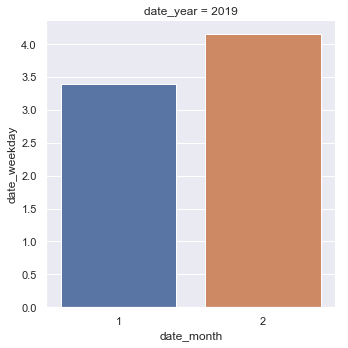

In [116]:
sns.catplot(data=data, x='date_month', y='date_weekday', col='date_year', kind='bar', ci=False);

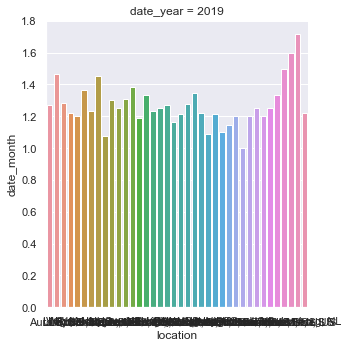

In [117]:
sns.catplot(data=data, x='location', y='date_month', col='date_year', kind='bar', ci=False);

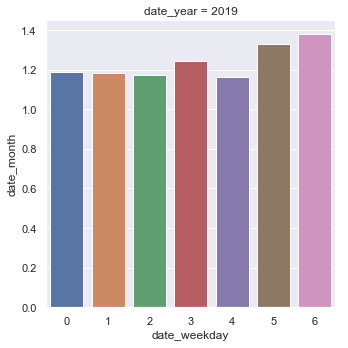

In [118]:
sns.catplot(data=data, x='date_weekday', y='date_month', col='date_year', kind='bar', ci=False);

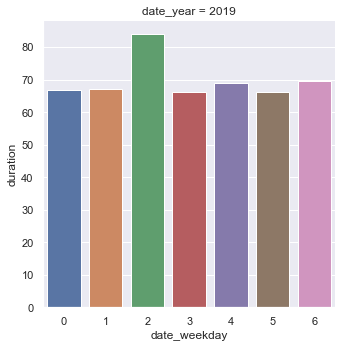

In [119]:
sns.catplot(x='date_weekday', y='duration', col='date_year', data=data, kind='bar', ci=False);

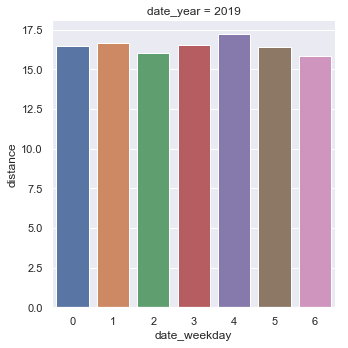

In [120]:
sns.catplot(x='date_weekday', y='distance', col='date_year', data=data, kind='bar', ci=False);

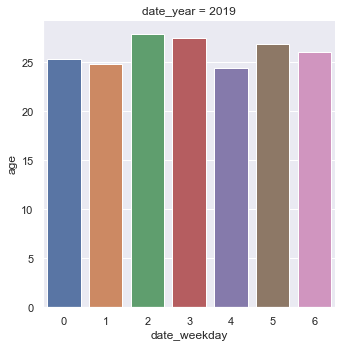

In [121]:
sns.catplot(x='date_weekday', y='age', col='date_year', data=data, kind='bar', ci=False);

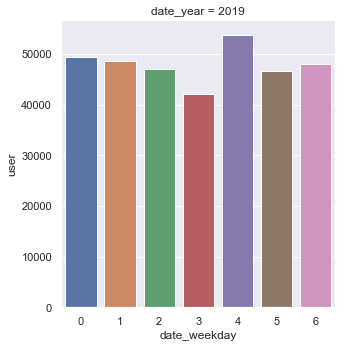

In [122]:
sns.catplot(x='date_weekday', y='user', col='date_year', data=data, kind='bar', ci=False);

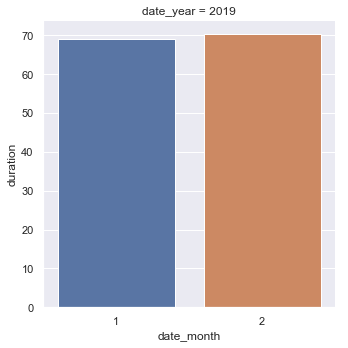

In [123]:
sns.catplot(x='date_month', y='duration', col='date_year', data=data, kind='bar', ci=False);

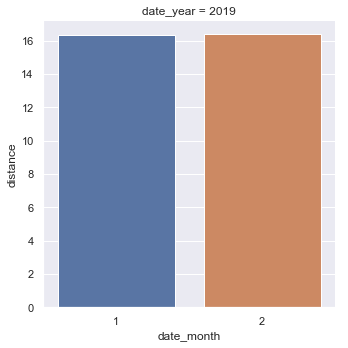

In [124]:
sns.catplot(x='date_month', y='distance', col='date_year', data=data, kind='bar', ci=False);

In [125]:
sns.pointplot(x='date_month', y='distanced', hue='gender', col='activity', data=data);

ValueError: Could not interpret input 'distanced'

In [ ]:
sns.pointplot(x='date_month', y='duration', hue='gender', col='activity', data=data);

In [ ]:
sns.pointplot(x='duration', y='location', hue='gender', col='activity', data=data);

In [ ]:
sns.catplot(x='date_month', y='duration', col='type', hue='gender' , data=data, kind='bar', ci=False);

# 1.9. Findings between data other than the date

In [ ]:
hist = sns.countplot(x='gender', data=data)
hist.set_title('The two genders');

In [ ]:
hist = sns.countplot(x='activity', data=data)
hist.set_title('The different activities');

In [ ]:
hist = sns.countplot(x='type', data=data)
hist.set_title('The different type');

In [ ]:
sns.catplot(x='gender', y='duration', data=data, kind='box');

In [ ]:
sns.catplot(x='activity', y='speed', data=data, kind='box');

In [ ]:
sns.jointplot(x='weight', y='speed', data=data, kind='scatter');

In [ ]:
sns.catplot(x='gender', y='distance', data=data, kind='box');

In [ ]:
activity = data;
sns.pairplot(activity);

In [ ]:
duration = data;
sns.pairplot(duration);

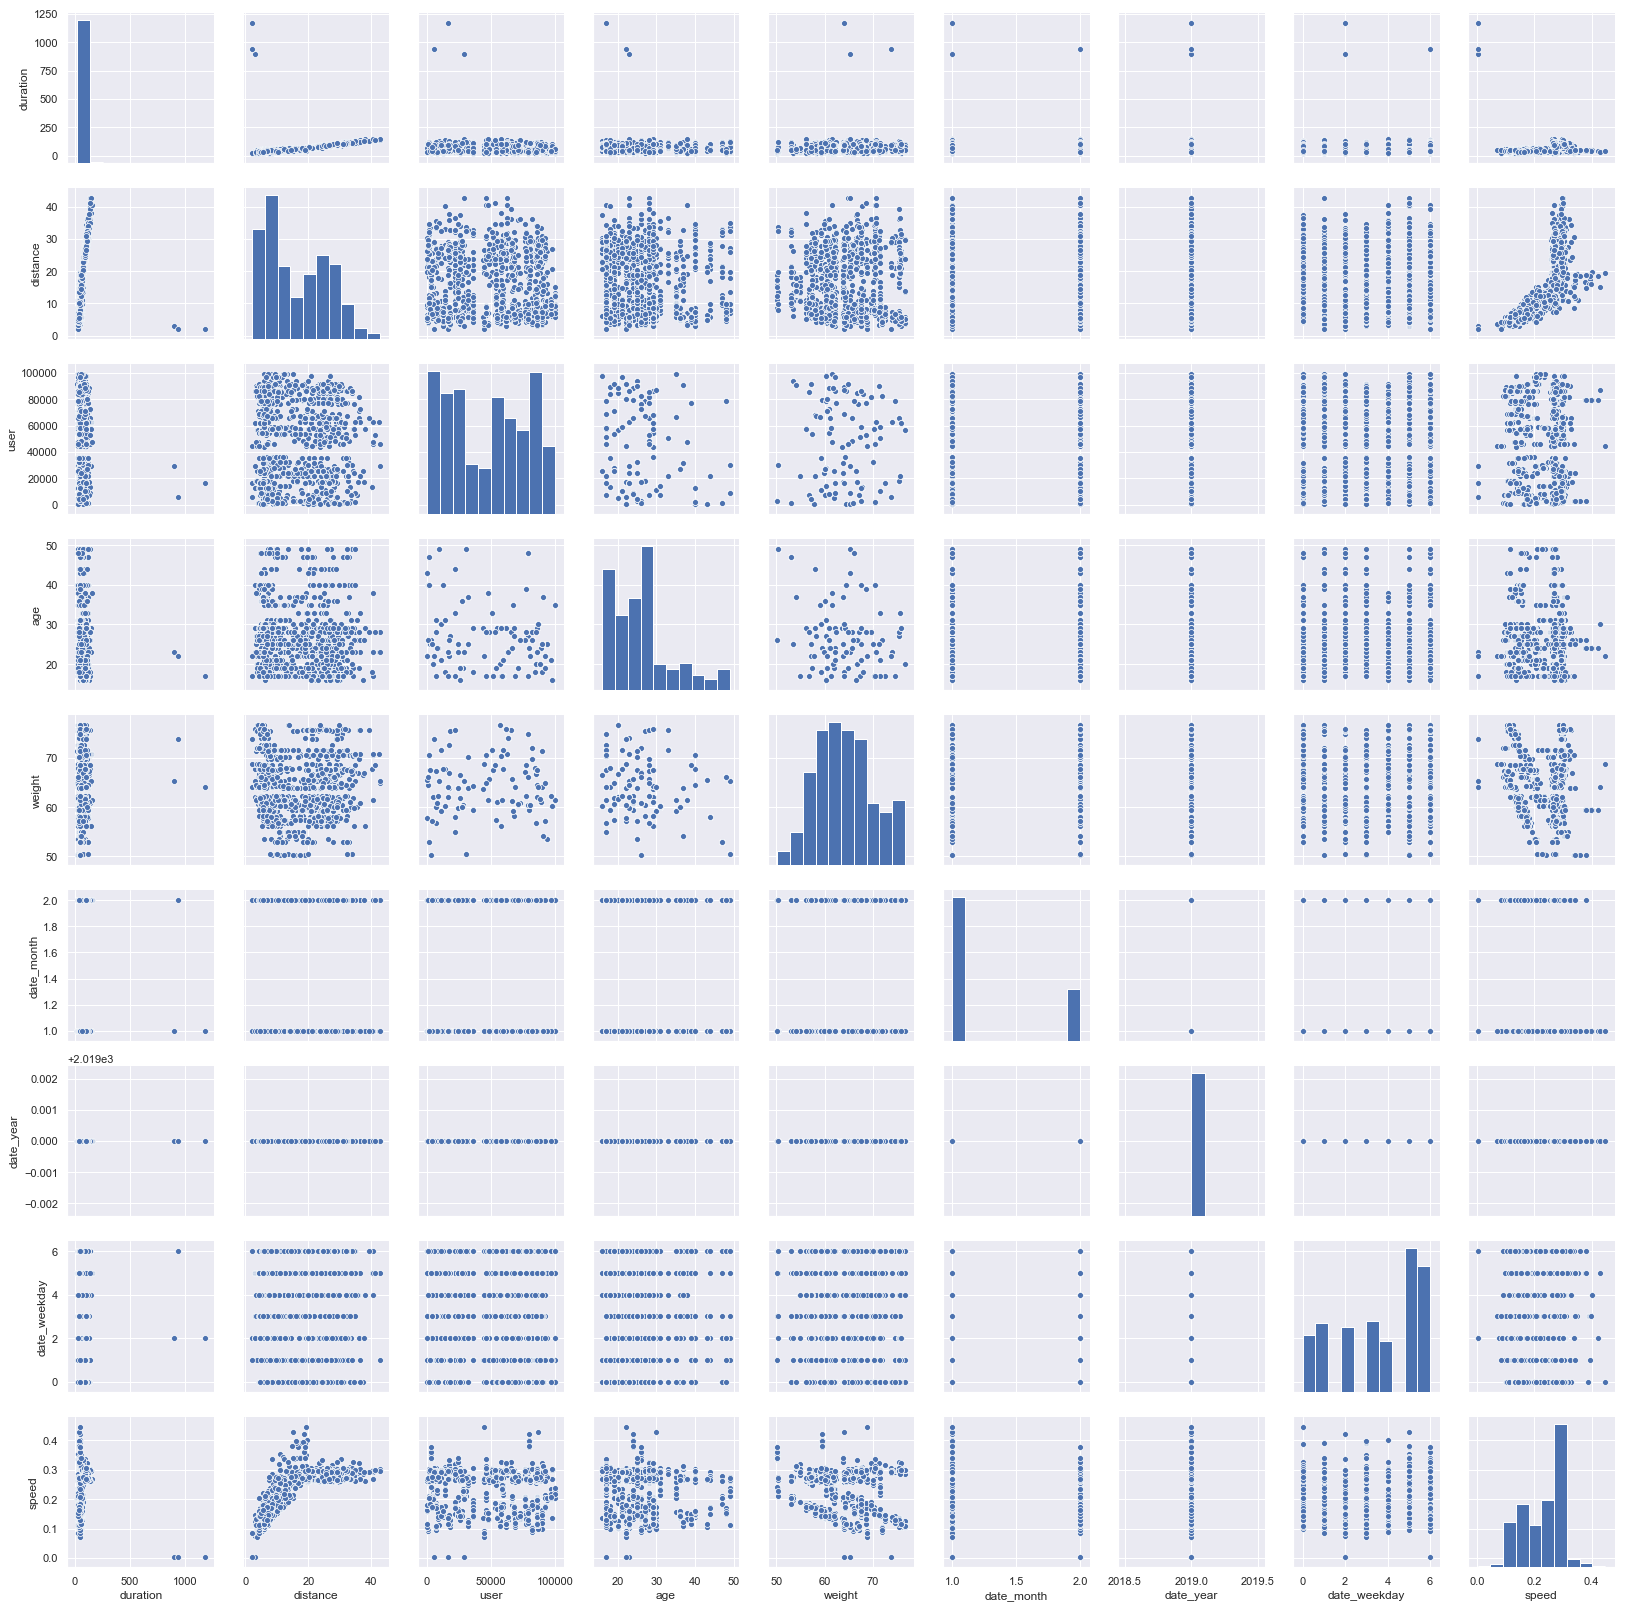

In [126]:
distance = data;
sns.pairplot(distance);

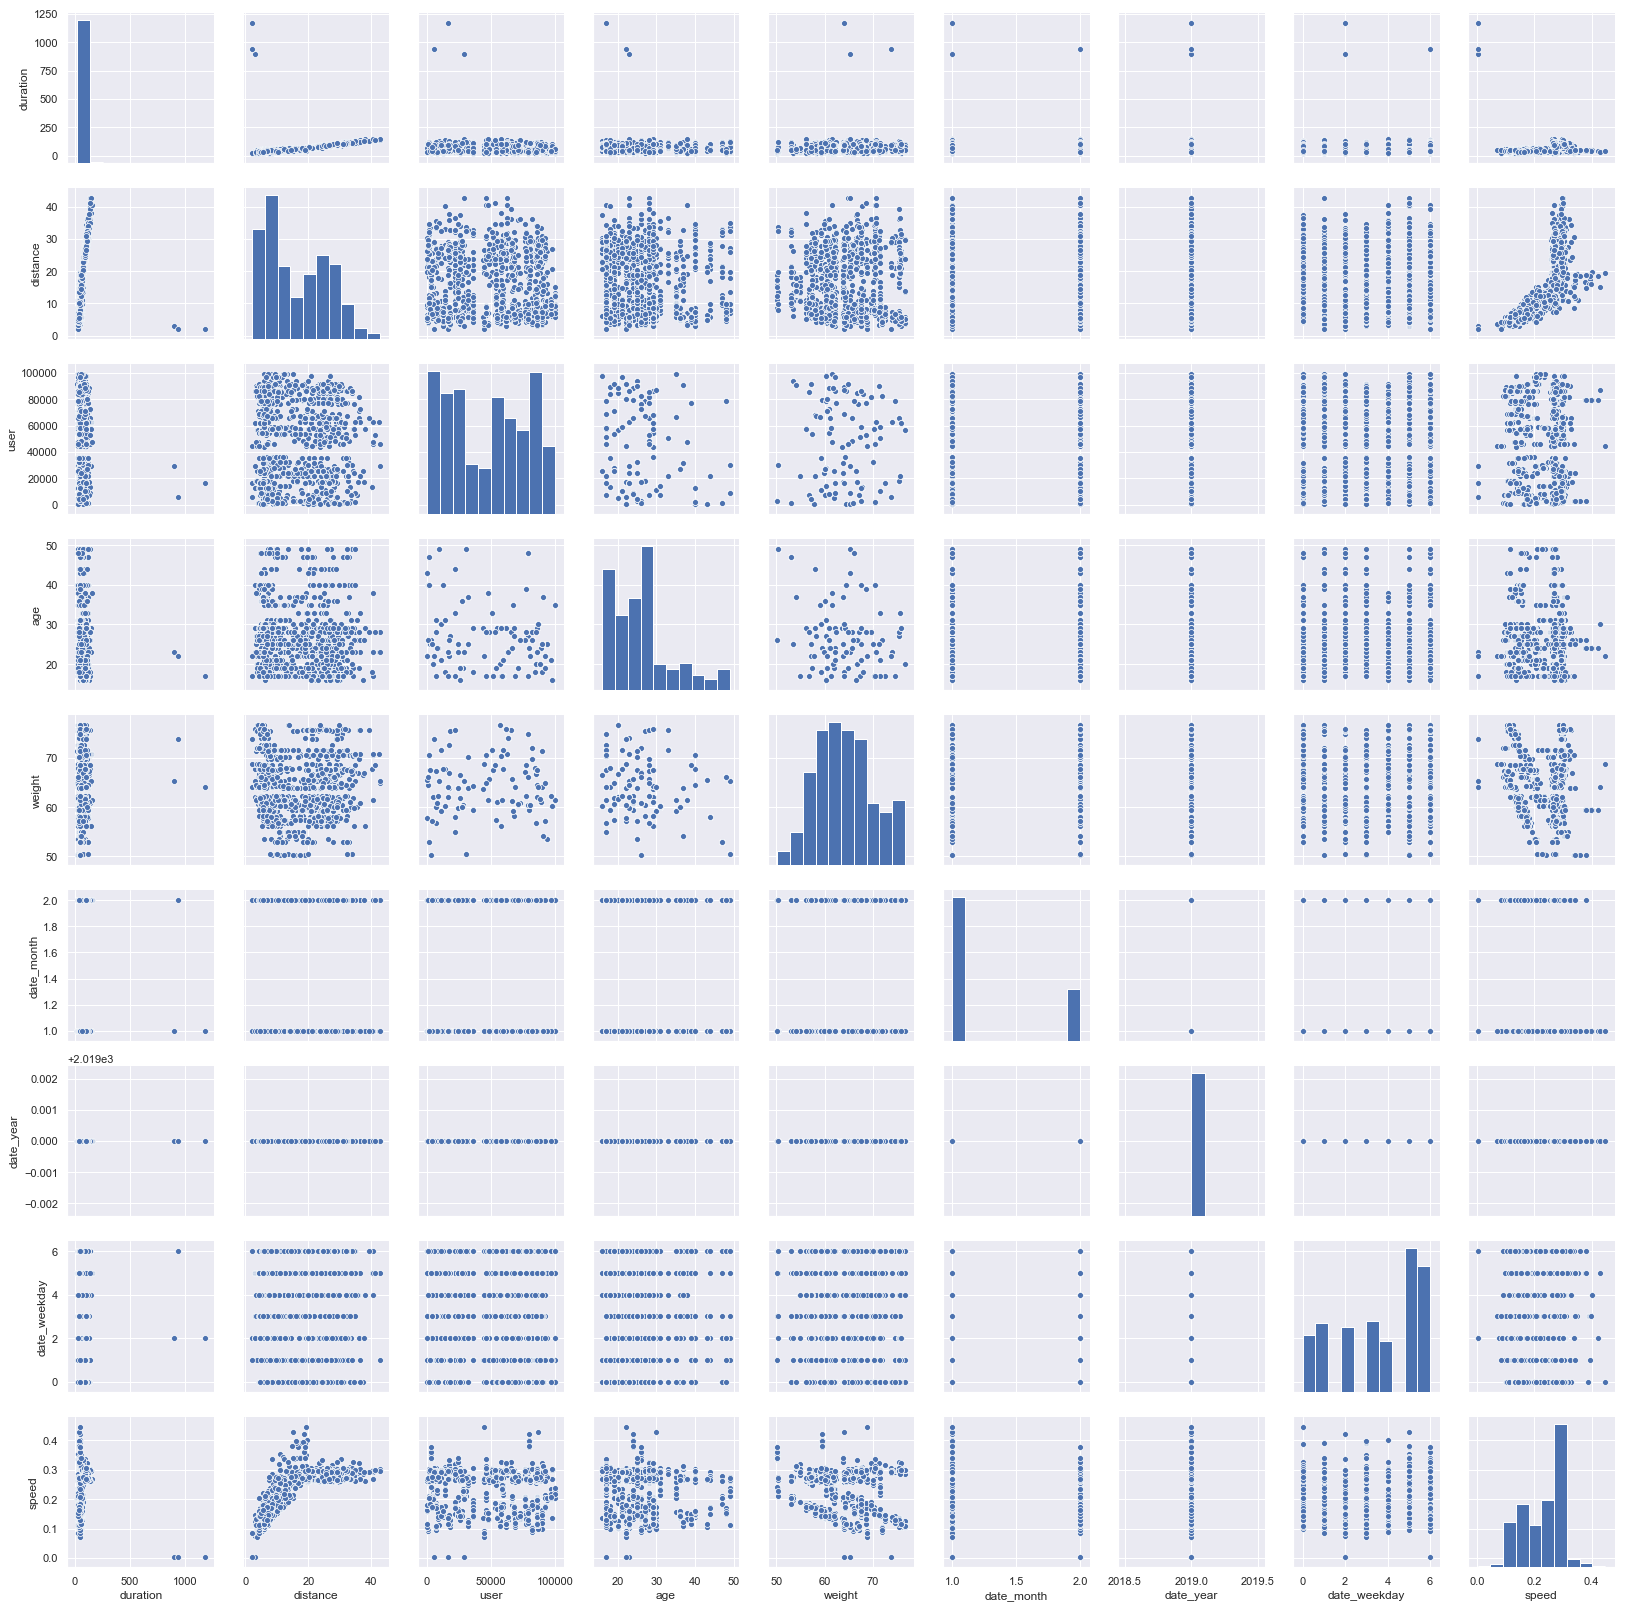

In [127]:
speed = data;
sns.pairplot(speed);

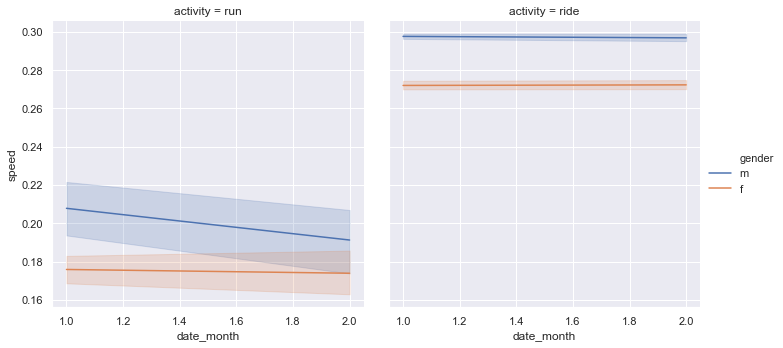

In [128]:
sns.set()
sns.relplot(x="date_month", y="speed", col="activity",
            hue="gender",
            kind="line", data=data);

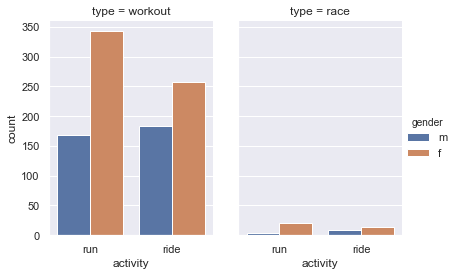

In [129]:
sns.catplot(x="activity", col="type", hue='gender', data=data, kind="count", height=4, aspect=.7);

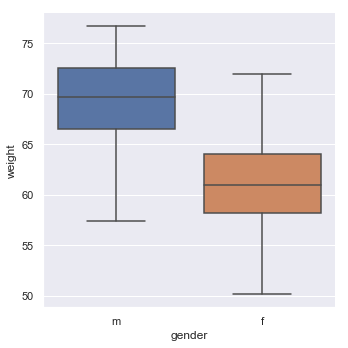

In [130]:
sns.catplot(x='gender', y='weight', data=data, kind='box');

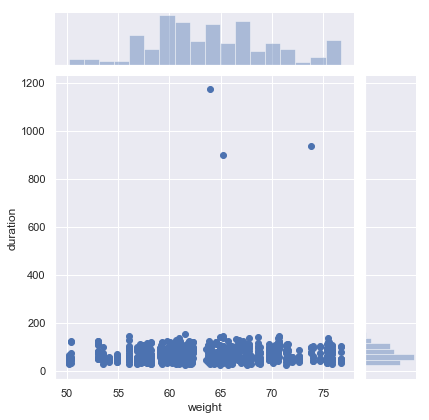

In [131]:
sns.jointplot(x='weight', y='duration', data=data, kind='scatter');

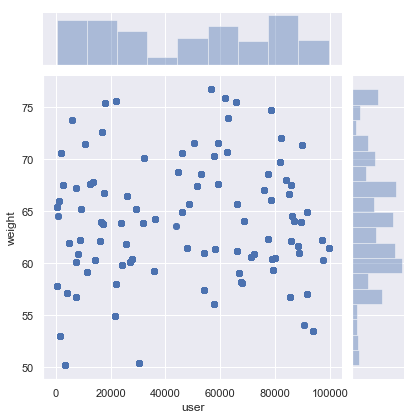

In [132]:
sns.jointplot(x='user', y='weight', data=data, kind='scatter');

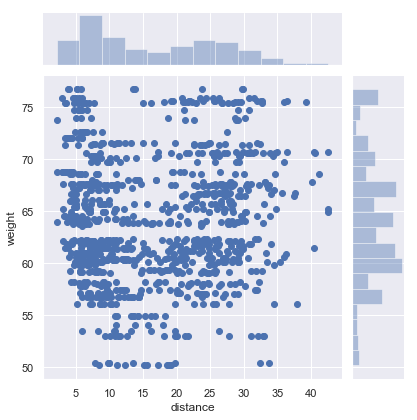

In [133]:
sns.jointplot(x='distance', y='weight', data=data, kind='scatter');

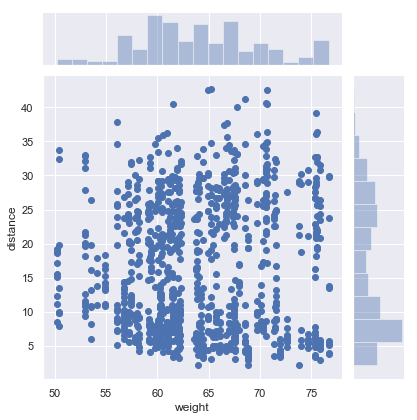

In [134]:
sns.jointplot(x='weight', y='distance', data=data, kind='scatter');

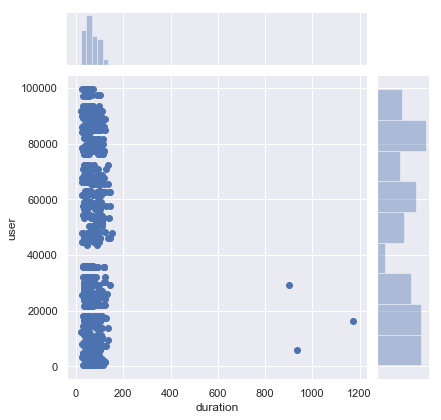

In [135]:
sns.jointplot(x='duration', y='user', data=data, kind='scatter');

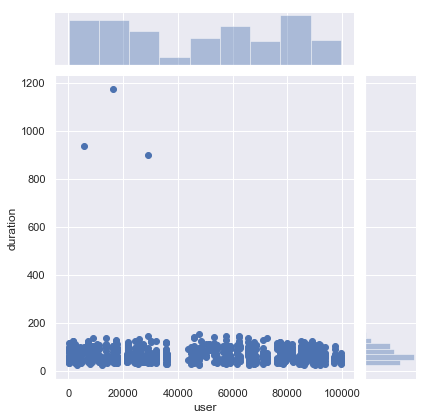

In [136]:
sns.jointplot(x='user', y='duration', data=data, kind='scatter');

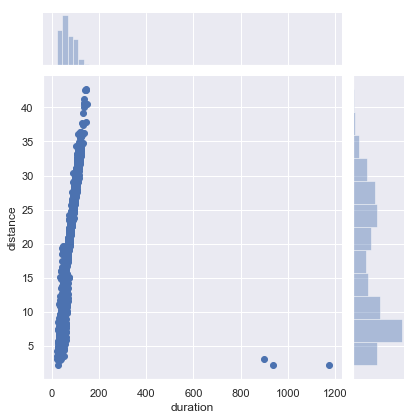

In [137]:
sns.jointplot(x='duration', y='distance', data=data, kind='scatter');

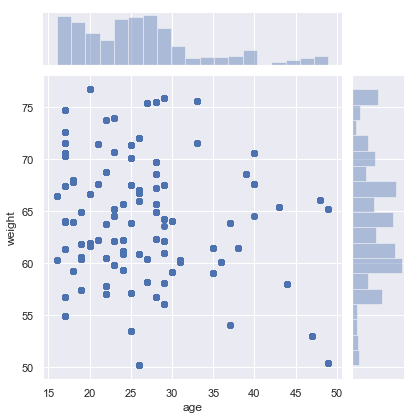

In [138]:
sns.jointplot(x='age', y='weight', data=data, kind='scatter');

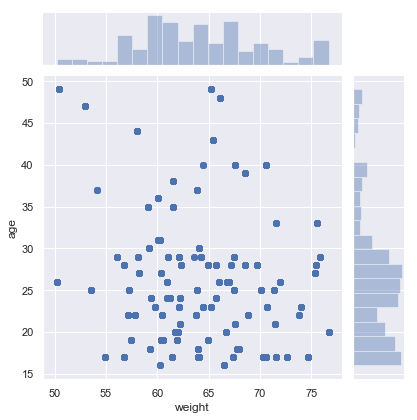

In [139]:
sns.jointplot(x='weight', y='age', data=data, kind='scatter');

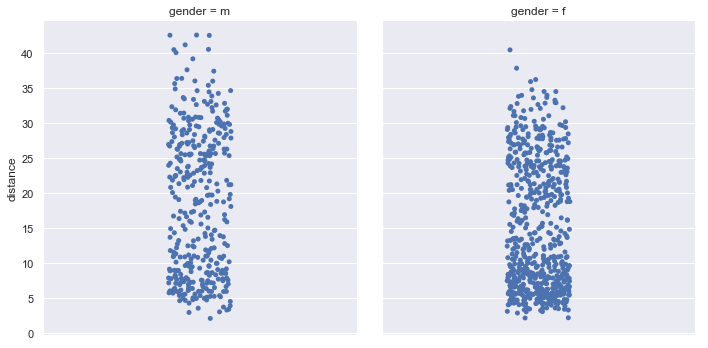

In [140]:
sns.catplot(y='distance', col='gender', data=data, kind='strip');

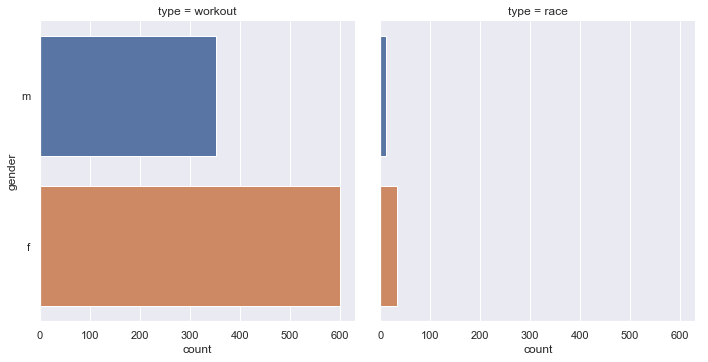

In [141]:
sns.catplot(y='gender', col='type', data=data, kind='count');

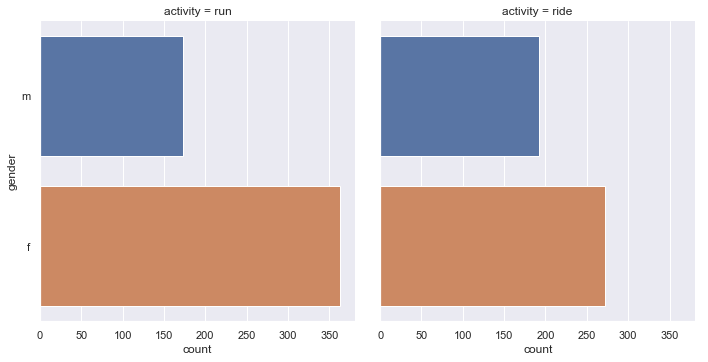

In [142]:
sns.catplot(y='gender', col='activity', data=data, kind='count');

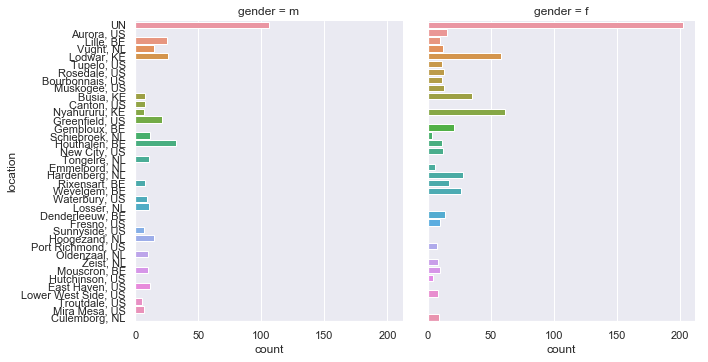

In [143]:
sns.catplot(y='location', col='gender', data=data, kind='count');

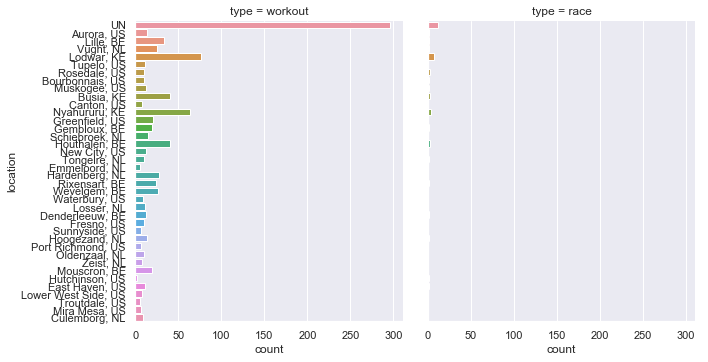

In [144]:
sns.catplot(y='location', col='type', data=data, kind='count');

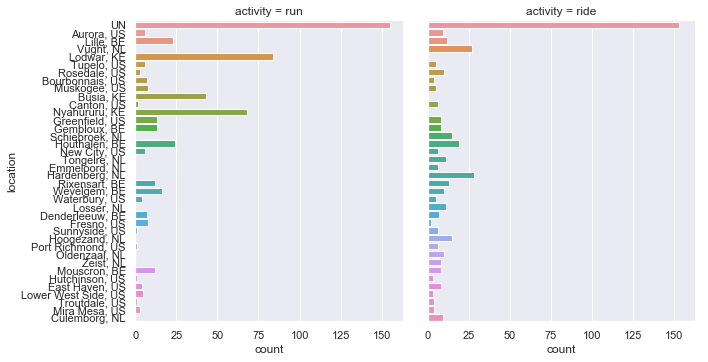

In [145]:
sns.catplot(y='location', col='activity', data=data, kind='count');

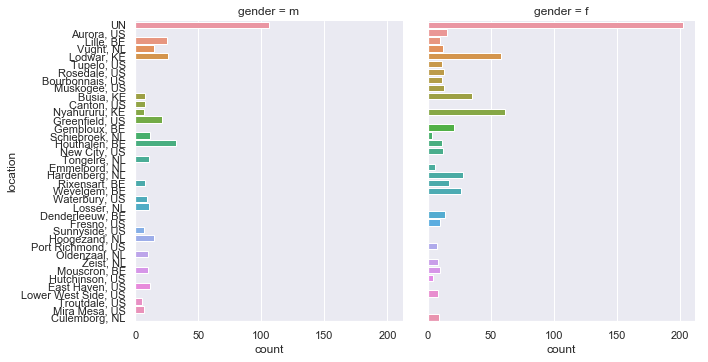

In [146]:
sns.catplot(y='location', col='gender', data=data, kind='count');

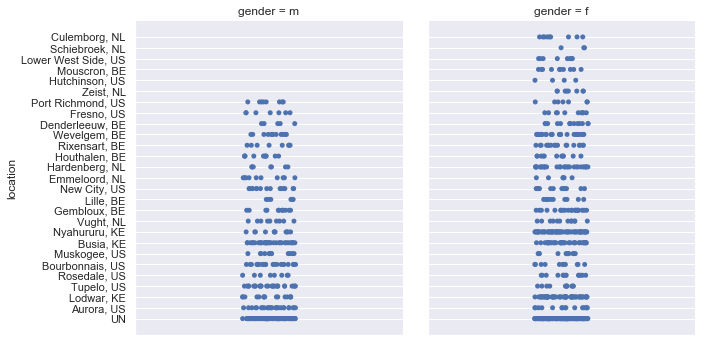

In [147]:
sns.catplot(y='location', col='gender', data=data, kind='strip');